# Programming Assignment 3

In [1]:
#import the dependencies 

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import math

## 1.1 Support Vector Machines

#### Linear SVM

In [2]:
### Loading the Data

with open("bclass/bclass-train") as file:
    num_of_samples = N = 0
    num_of_features = M = 0
    for i,line in enumerate(file):
        if i == 0:
#             print(line)
            num_of_features = M = len(line.split()) - 1        
    num_of_samples = N = i + 1
    

def acquireData():
    with open("bclass/bclass-train") as file:

        feature_train = np.zeros([N,M])
        label_train = np.zeros(N)
        for i,line in enumerate(file):
            line = line.split()
            label_train[i], feature_train[i] = float(line[0]) , list(map(float,line[1:]))

    num_of_samples_test = sum(1 for line in open("bclass/bclass-test"))

    with open("bclass/bclass-test") as file:

        feature_test = np.zeros([num_of_samples_test,M])
        label_test = np.zeros(num_of_samples_test)
        for i,line in enumerate(file):
            line = line.split()
            label_test[i], feature_test[i] = float(line[0]) , list(map(float,line[1:]))
    return feature_train,label_train,feature_test,label_test
feature_train,label_train,feature_test,label_test = acquireData()
print("Loading data Done")

Loading data Done


> Checking How the Training data is organized

In [3]:
print(feature_train[0], feature_train.shape)

[ 1.       0.       0.62121 -0.63636  0.       0.       0.       0.       0.3447
  0.28788  0.42803  0.39394 -0.07576  0.51894  0.36364  0.31439 -0.53788
  0.32955  0.12121 -0.14773  0.01894 -0.53409 -0.57576  0.17803  0.29167
 -0.27273  0.25758 -0.57576  0.43182  0.24242  0.18182 -0.02273  0.17045
 -0.41667] (200, 34)


In [4]:
print(label_train)

[-1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.
 -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.
  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.
 -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.
  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.
 -1. -1.]


In [5]:
print(feature_test[0], feature_test.shape)

[ 1.       0.       0.39179 -0.06343  0.97464  0.04328  1.       1.
  0.35821  0.15299  0.54478  0.1306   0.61567 -0.8209   0.57836  0.6791
  0.66791 -0.10448  0.46642 -0.11567  0.65574  0.14792  0.83209  0.45522
  0.47015  0.16418  0.49309  0.1463   0.32463 -0.02612  0.39118  0.13521
  0.34411  0.12755] (76, 34)


> Define the classifier Now

In [6]:
clf = svm.SVC()
clf.fit(feature_train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

> Test the classfier Now

In [7]:
clf.predict(feature_test[:5]), label_test[:5]

(array([ 1.,  1.,  1., -1.,  1.]), array([-1.,  1.,  1., -1.,  1.]))

Above we can see that our classifier performs quite well
> Lets calculate its accuracy

In [8]:
def ErrorRate(data, labels):
    numOfErrors = 0
    predicted_values = clf.predict(data)
    for i in range(data.shape[0]):
        if(labels[i] != predicted_values[i]):
            numOfErrors+=1
    return numOfErrors/data.shape[0]*100

print("Training Error Rate \t:: \t{}%".format(ErrorRate(feature_train,label_train)))
print("Testing Error Rate \t:: \t{}%".format(ErrorRate(feature_test,label_test)))

Training Error Rate 	:: 	5.5%
Testing Error Rate 	:: 	7.894736842105263%


The training error rate is 5.5% and the testing rate is 7.8%
Next task is to try with different values of C. What is C

It is the Penalty parameter C of the error term.  
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.



> Trying linear SVM for different values of SVM

In [9]:
C = [0.25, 0.5, 1, 2, 4]
train_error_rates = np.zeros(len(C))
test_error_rates = np.zeros(len(C))

for i, c in enumerate(C):
    clf = svm.SVC(C=c,kernel='linear')
    clf.fit(feature_train, label_train)
    train_error_rates[i] = ErrorRate(feature_train,label_train)
    test_error_rates[i] =  ErrorRate(feature_test,label_test)
    print("\nC value :\t{} \tTraining Error Rate \t:: \t{} %".format(c, ErrorRate(feature_train,label_train)))
    print("C value :\t{} \tTesting Error Rate \t:: \t{} %".format(c,ErrorRate(feature_test,label_test)))
    print("Number of Support Vector Needed for this C Value ::", len(clf.support_vectors_))
#     print("Number of Support Vector Needed for this C Value ::", clf.n_support_)


C value :	0.25 	Training Error Rate 	:: 	7.000000000000001 %
C value :	0.25 	Testing Error Rate 	:: 	15.789473684210526 %
Number of Support Vector Needed for this C Value :: 78

C value :	0.5 	Training Error Rate 	:: 	5.0 %
C value :	0.5 	Testing Error Rate 	:: 	15.789473684210526 %
Number of Support Vector Needed for this C Value :: 70

C value :	1 	Training Error Rate 	:: 	5.0 %
C value :	1 	Testing Error Rate 	:: 	15.789473684210526 %
Number of Support Vector Needed for this C Value :: 64

C value :	2 	Training Error Rate 	:: 	3.5000000000000004 %
C value :	2 	Testing Error Rate 	:: 	15.789473684210526 %
Number of Support Vector Needed for this C Value :: 55

C value :	4 	Training Error Rate 	:: 	3.5000000000000004 %
C value :	4 	Testing Error Rate 	:: 	17.105263157894736 %
Number of Support Vector Needed for this C Value :: 49


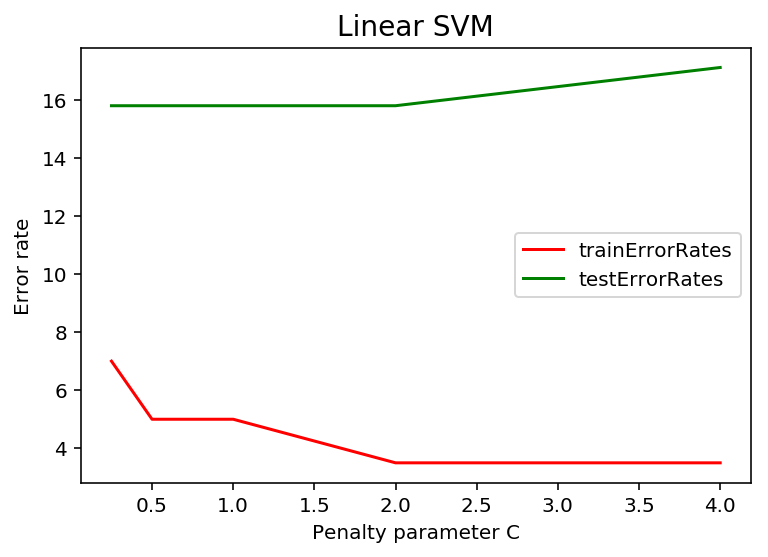

In [10]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(C,train_error_rates, 'r',label = "trainErrorRates")
ax.plot(C,test_error_rates, 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("Linear SVM", fontsize=14)
plt.xlabel("Penalty parameter C")
plt.ylabel("Error rate")
plt.show();

#### The smaller the margin the smaller the number of Support Vectors.  As explained and Seen above the number of the support vectors decrease with the increasing value of C since the margin decreases with incresing C to decrease the number of misclassfication errors.

This data is lineary separable hence test error increases for more complicated models with smaller margin and less number of support vectors

##     1.2 SVM with RBF Kernel

In [11]:
Tau = [0.25, 0.5, 1, 2, 4]
train_error_rates = np.zeros(len(Tau))
test_error_rates = np.zeros(len(Tau))

for i, t in enumerate(Tau):
    clf = svm.SVC(C=t,kernel='rbf')
    clf.fit(feature_train, label_train)
    train_error_rates[i] = ErrorRate(feature_train,label_train)
    test_error_rates[i] =  ErrorRate(feature_test,label_test)
    print("\nC value :\t{} \tTraining Error Rate \t:: \t{} %".format(t, ErrorRate(feature_train,label_train)))
    print("Tau value :\t{} \tTesting Error Rate \t:: \t{} %".format(t,ErrorRate(feature_test,label_test)))
    print("Number of Support Vector Needed for this C Value ::", len(clf.support_vectors_))
#     print("Number of Support Vector Needed for this C Value ::", clf.n_support_)


C value :	0.25 	Training Error Rate 	:: 	12.0 %
Tau value :	0.25 	Testing Error Rate 	:: 	19.736842105263158 %
Number of Support Vector Needed for this C Value :: 143

C value :	0.5 	Training Error Rate 	:: 	7.5 %
Tau value :	0.5 	Testing Error Rate 	:: 	10.526315789473683 %
Number of Support Vector Needed for this C Value :: 120

C value :	1 	Training Error Rate 	:: 	5.5 %
Tau value :	1 	Testing Error Rate 	:: 	7.894736842105263 %
Number of Support Vector Needed for this C Value :: 100

C value :	2 	Training Error Rate 	:: 	4.5 %
Tau value :	2 	Testing Error Rate 	:: 	6.578947368421052 %
Number of Support Vector Needed for this C Value :: 79

C value :	4 	Training Error Rate 	:: 	3.5000000000000004 %
Tau value :	4 	Testing Error Rate 	:: 	6.578947368421052 %
Number of Support Vector Needed for this C Value :: 67


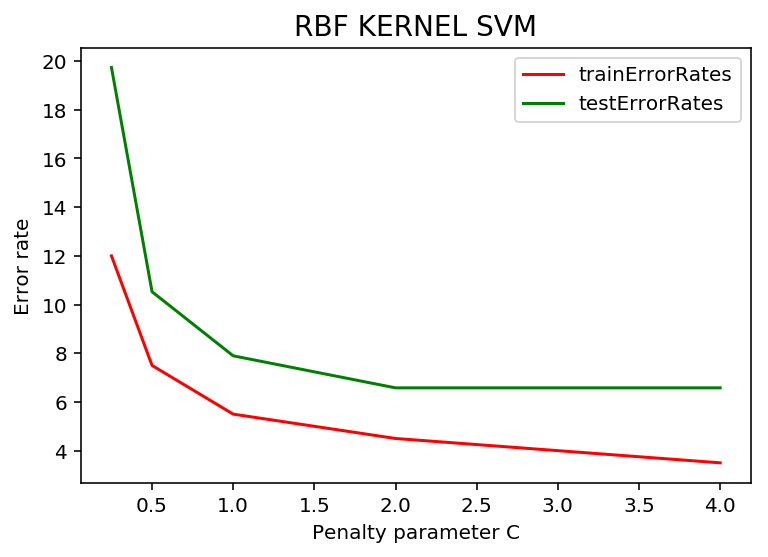

In [12]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(C,train_error_rates, 'r',label = "trainErrorRates")
ax.plot(C,test_error_rates, 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("RBF KERNEL SVM", fontsize=14)
plt.xlabel("Penalty parameter C")
plt.ylabel("Error rate")
plt.show();

## 2 Gaussian Mixture Model

Implementing the supporting funcitons in Gaussian Mixture Models

> Analysis of different K value and plotting is done at very end after plotting for every value of K

In [13]:
def multi_gaussian(x, mean, covariance):
	"""
	Probability 
	x: 1xD
	mean: 1xD
	covariance: DxD
	"""
	D = len(x)
	x = np.array(x).reshape(1, D)
	mean = np.array(mean).reshape(1, D)
	covariance = np.array(covariance)
	detCov = np.linalg.det(covariance)
	xhat = x - mean
	A = .5 / ((math.pi ** (.5 * D)) * (detCov ** .5))
	B = -.5 * xhat.dot(np.linalg.inv(covariance).dot(xhat.T));
	E = np.exp(B)

	return A * E 

def gaussian(x, mean, variance):
	"""
	x: 1
	mean: 1
	variance: 1
	"""
	A = (2 * math.pi * variance) ** -.5
	B = -.5 * (x - mean) ** 2 / variance

	return A * np.exp(B)

def my_multi_gaussian_matrix(X, mean, covariance):
	"""
	Probability of N data points
	X: NxD
	mean: 1xD
	covariance: DxD
	"""
	X = np.array(X)
	N = X.shape[0]
	D = X.shape[1]
	# Check dimension
	if (D != len(mean)):
		try:
			raise Exception('Dimension not valid')
		except Exception as exp:
			print (exp)
		return

	
	mean = np.array(mean).reshape(1, D)
	Xhat = X - mean
	covariance = np.array(covariance)
	# print "Covariance: "
	# print covariance
	detCov = np.linalg.det(covariance)
	# print 'det', detCov
	invCov = np.linalg.inv(covariance)
	A = .5 / ((math.pi ** (.5 * D)) * (detCov ** .5))
	B = Xhat.dot(invCov)
	C = B.dot(Xhat.T)
	E = -.5 * np.diagonal(C)
	F = np.exp(E)

	return A * F

def multi_gaussian_matrix(X, mean, cov):
	X = np.array(X)
	mean = np.array(mean)
	cov = np.array(cov)
	# print X.shape
	# print mean.shape
	return multivariate_normal.pdf(X, mean, cov, allow_singular=True);

In [29]:
log_prob_norm_plot = []

class GaussianMixture:
    def __init__(self, K, tol = 1e-2):
        self._K = K
        self._tol = tol

    # Estimate model parameters with the EM algorithm.
    def fit(self, X):
        # Data
        self._Xtr = np.array(X)
        # Data dimension
        self._D = self._Xtr.shape[1]
        self._N = self._Xtr.shape[0]
        # Init parameters
        self._init_params()
        # EM algorithm
        temp = self._em()
#         print("Pranoy", temp)
        return temp

    # Initialize parameters
    def _init_params(self):
        # Weight of mixture
        pi = np.random.rand(self._K)
        pi /= np.sum(pi)
        # Means: init by kmeans
        means = []
        kmeans = KMeans(n_clusters = self._K, random_state = 0)\
                .fit(self._Xtr)
        means = kmeans.cluster_centers_
        # Covariances from means
        covariances = self._covariances(means, kmeans.labels_, self._Xtr)

        self._pi, self._means, self._covariances = pi, means, covariances

    # Covariances from data and means
    def _covariances(self, means, labels, data):
        covariances = []
        for k in range(self._K):
            mean = means[k]
            X_k = data[labels == k]
            # print "X_%d: " % k, X_k
            N = X_k.shape[0]
            Xbar = X_k - mean # NxD
            # print Xbar.shape
            cov = 1. * Xbar.T.dot(Xbar) / N
            covariances.append(cov)

        return np.array(covariances)

    # Covariance
    def _covariance(self, mean, X):
        Xbar = X - mean
        cov = 1. * Xbar.T.dot(Xbar) / X.shape[0]

        return cov

    # EM algorithm, with paramaters initialized
    def _em(self):
        old_log_likelihood = -9999
        global log_prob_norm_plot
        for i in range(2000):
            
            # print self._pi
            
            # E - step: estimate posterior
            gaussian_mat = []
            for k in range(self._K):
                try:
                    prob_vec = multi_gaussian_matrix(self._Xtr,\
                            self._means[k], self._covariances[k])
                    # print prob_vec.shape
                except Exception as exp:
                    self._means[k] = self._means[0] + 10 * np.random.rand(self._D)
                    self._covariances[k] = self._covariance(self._means[k], self._Xtr)
                    # prob_vec = np.random.rand(self._N)
                    # prob_vec = 1. * prob_vec / np.sum(prob_vec)
                    # print prob_vec.shape
                    prob_vec = multi_gaussian_matrix(self._Xtr,\
                            self._means[k], self._covariances[k])
                gaussian_mat.append(prob_vec)
            gaussian_mat = np.array(gaussian_mat).T # NxK
            # print gaussian_mat.shape
            pi_diag = np.diag(self._pi) # KxK
            self._unnormal_posterior_matrix = gaussian_mat.dot(pi_diag) # NxK
            # Normalize
            self._posterior_matrix = 1. * self._unnormal_posterior_matrix / \
                    np.sum(self._unnormal_posterior_matrix, axis = 1).reshape(self._N, 1)
            
            # M - step: optimize parameters
            trans_posterior = self._posterior_matrix.T # KxN
            k_sums = np.sum(trans_posterior, axis = 1).reshape(self._K, 1) # Kx1
            self._means = trans_posterior.dot(self._Xtr) / k_sums
            self._pi = (k_sums / self._N).reshape(self._K)
            # Covariances
            covariances = []
            for k in range(self._K):
                Xbar_k = self._Xtr - self._means[k] # NxD
                post_k = self._posterior_matrix[:, k] # N
                cov = (post_k * Xbar_k.T).dot(Xbar_k) * 1. / k_sums[k][0]
                covariances.append(cov)
            self._covariances = np.array(covariances)   

            # Check convergence
            if(i % 50 == 0):
                print ('Iterator number %d' % (i), "  Log-Likelihood", old_log_likelihood)
            log_prob_norm_plot.append(old_log_likelihood)
            new_log_likehood = self._log_likelihood()
            if math.fabs(new_log_likehood - old_log_likelihood) < self._tol:
                break
            old_log_likelihood = new_log_likehood
        print ('Iterator number %d' % (i + 1), "  Log-Likelihood", old_log_likelihood)
        return old_log_likelihood

            
    # Calculate log likelihood
    def _log_likelihood(self):
        # self._unnormal_posterior_matrix: NxK
        sum_k = np.sum(self._unnormal_posterior_matrix, axis = 1)
        log_sum_k = np.log(sum_k)
        log_likelihood = np.sum(log_sum_k)

        return log_likelihood

    # Get parameters for this estimator.
    def get_params(self):
        return self._pi, self._means, self._covariances

    # Predict the labels for the data samples in X using trained model.
    def predict(self, X):
        X = np.array(X)
        print (X.shape)
        N = X.shape[0]
        D = X.shape[1]
        # Check dimension
        if (D != self._D):
            try:
                raise Exception('Dimension not valid')
            except Exception as exp:
                print (exp)
            return
        # Predict
        gaussian_mat = []
        for k in range(self._K):
            prob_vec = multi_gaussian_matrix(X,\
                    self._means[k], self._covariances[k])
            gaussian_mat.append(prob_vec)
        gaussian_mat = np.array(gaussian_mat).T # NxK
        pi_diag = np.diag(self._pi) # KxK
        mat = gaussian_mat.dot(pi_diag) # NxK
        pred = np.argmax(mat, axis = 1)

        return pred

In [30]:
def plotLogLikihood(log_prob_norm_plot):
    axx = plt.subplots()[1]
    axx.plot(list(range(len(log_prob_norm_plot))),log_prob_norm_plot, 'r',label = "log-likelihood")
    legend = axx.legend()
    plt.title("Gaussian Mixture Model log-likelihood", fontsize=14)
    plt.xlabel("Iterations")
    plt.ylabel("log-likelihood")
    plt.show();

Trying Out different Values of K
Try for k value:  2
Iterator number 0   Log-Likelihood -9999
Iterator number 15   Log-Likelihood -130.027774399


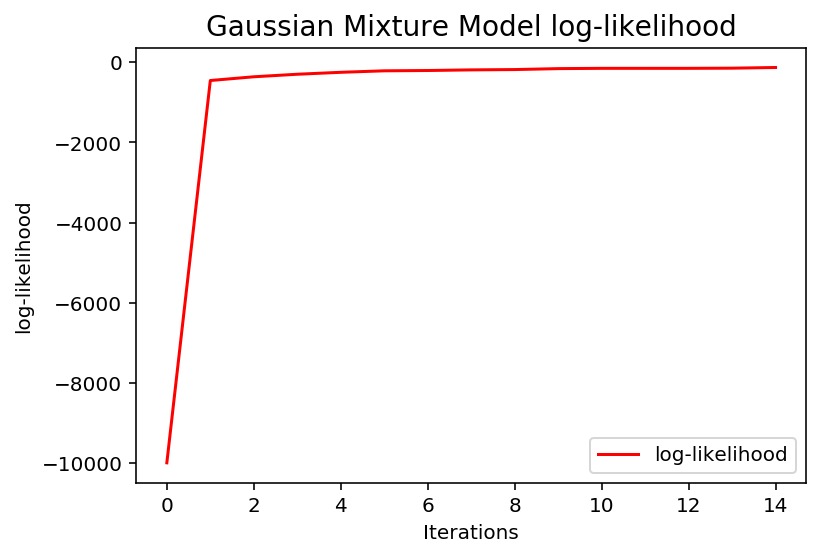

Try for k value:  3
Iterator number 0   Log-Likelihood -9999
Iterator number 8   Log-Likelihood 2026.07874847


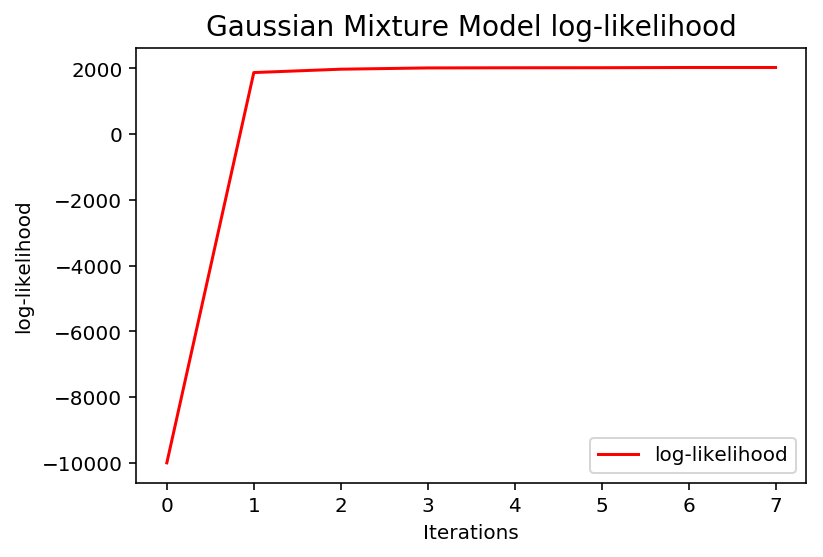

Try for k value:  4
Iterator number 0   Log-Likelihood -9999
Iterator number 7   Log-Likelihood 1461.51613529


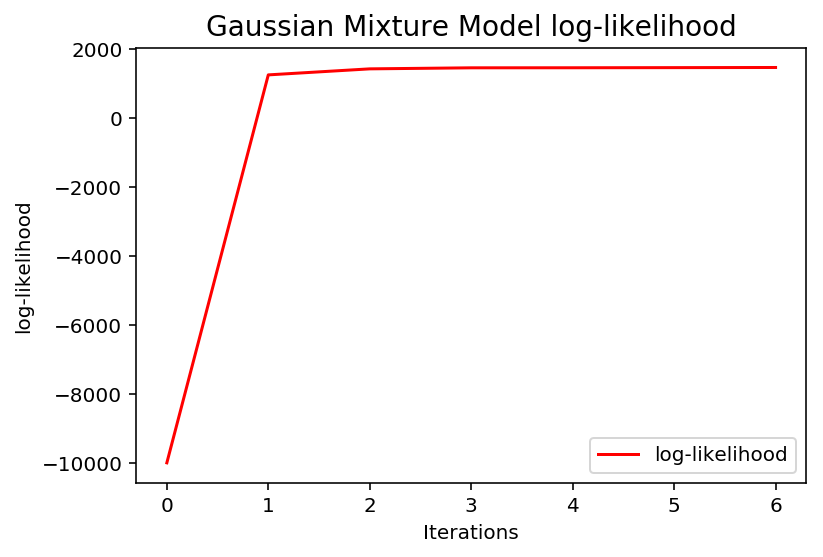

Try for k value:  5
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 2453.34839815
Iterator number 100   Log-Likelihood 2453.34839816
Iterator number 150   Log-Likelihood 2453.34839816
Iterator number 200   Log-Likelihood 2453.34839815
Iterator number 250   Log-Likelihood 2453.34839816
Iterator number 300   Log-Likelihood 2453.34839816
Iterator number 350   Log-Likelihood 2453.34839815
Iterator number 400   Log-Likelihood 2453.34839816
Iterator number 450   Log-Likelihood 2453.34839816
Iterator number 500   Log-Likelihood 2453.34839815
Iterator number 550   Log-Likelihood 2453.34839816
Iterator number 600   Log-Likelihood 2453.34839816
Iterator number 650   Log-Likelihood 2453.34839815
Iterator number 700   Log-Likelihood 2453.34839816
Iterator number 750   Log-Likelihood 2453.34839816
Iterator number 800   Log-Likelihood 2453.34839815
Iterator number 850   Log-Likelihood 2453.34839816
Iterator number 900   Log-Likelihood 2453.34839816
Iterator number 950   

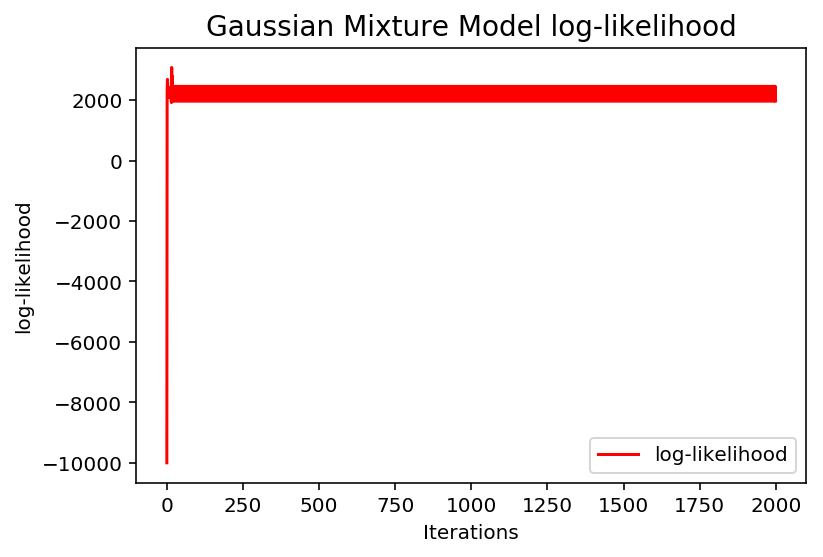

Try for k value:  6
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 2420.42047474
Iterator number 100   Log-Likelihood 2207.56492309
Iterator number 150   Log-Likelihood 2213.24555124
Iterator number 200   Log-Likelihood 2207.56492309
Iterator number 250   Log-Likelihood 2213.24555124
Iterator number 300   Log-Likelihood 2207.56492309
Iterator number 350   Log-Likelihood 2213.24555124
Iterator number 400   Log-Likelihood 2207.56492309
Iterator number 450   Log-Likelihood 2213.24555124
Iterator number 500   Log-Likelihood 2207.56492309
Iterator number 550   Log-Likelihood 2213.24555124
Iterator number 600   Log-Likelihood 2207.56492309
Iterator number 650   Log-Likelihood 2213.24555124
Iterator number 700   Log-Likelihood 2207.56492309
Iterator number 750   Log-Likelihood 2213.24555124
Iterator number 800   Log-Likelihood 2207.56492309
Iterator number 850   Log-Likelihood 2213.24555124
Iterator number 900   Log-Likelihood 2207.56492309
Iterator number 950   

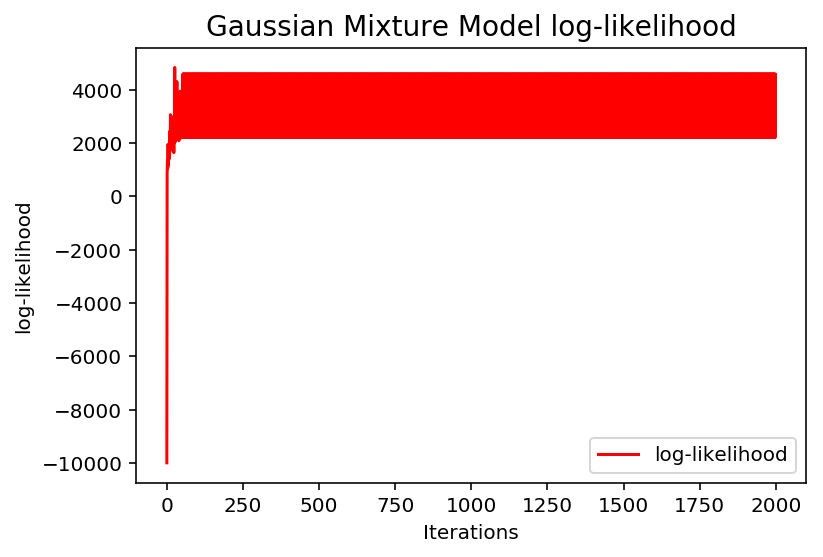

Try for k value:  7
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 3188.67452052
Iterator number 100   Log-Likelihood 3682.12634251
Iterator number 150   Log-Likelihood 2958.19106586
Iterator number 200   Log-Likelihood 3925.05300081
Iterator number 250   Log-Likelihood 3735.87345893
Iterator number 300   Log-Likelihood 4942.18375226
Iterator number 350   Log-Likelihood 3529.01061027
Iterator number 400   Log-Likelihood 4317.2025352
Iterator number 450   Log-Likelihood 3515.53441607
Iterator number 500   Log-Likelihood 4162.41724013
Iterator number 550   Log-Likelihood 3785.72295659
Iterator number 600   Log-Likelihood 3397.53405766
Iterator number 650   Log-Likelihood 6027.49012166
Iterator number 700   Log-Likelihood 3873.73387728
Iterator number 750   Log-Likelihood 3429.96241459
Iterator number 800   Log-Likelihood 3447.03189204
Iterator number 850   Log-Likelihood 3197.00693851
Iterator number 900   Log-Likelihood 5938.87485742
Iterator number 950   L

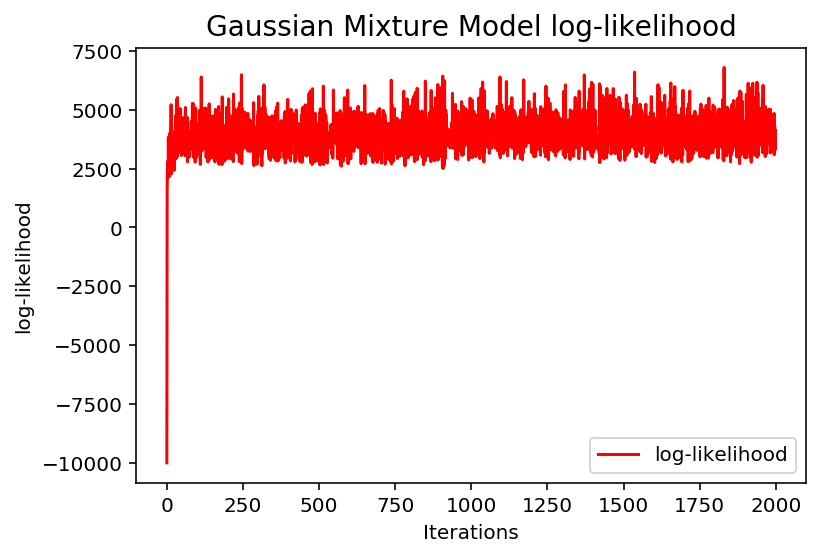

Try for k value:  8
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 2537.67074055
Iterator number 100   Log-Likelihood 2697.06893427
Iterator number 150   Log-Likelihood 3810.77929794
Iterator number 200   Log-Likelihood 3405.09597588
Iterator number 250   Log-Likelihood 3251.71426673
Iterator number 300   Log-Likelihood 3931.95856299
Iterator number 350   Log-Likelihood 3413.95555714
Iterator number 400   Log-Likelihood 3344.24306209
Iterator number 450   Log-Likelihood 4549.40971684
Iterator number 500   Log-Likelihood 2679.46885191
Iterator number 550   Log-Likelihood 4173.75061345
Iterator number 600   Log-Likelihood 3796.23815943
Iterator number 650   Log-Likelihood 4032.65067219
Iterator number 700   Log-Likelihood 3248.75554324
Iterator number 750   Log-Likelihood 2901.89823928
Iterator number 800   Log-Likelihood 4344.36728528
Iterator number 850   Log-Likelihood 3821.2867081
Iterator number 900   Log-Likelihood 4558.49315522
Iterator number 950   L

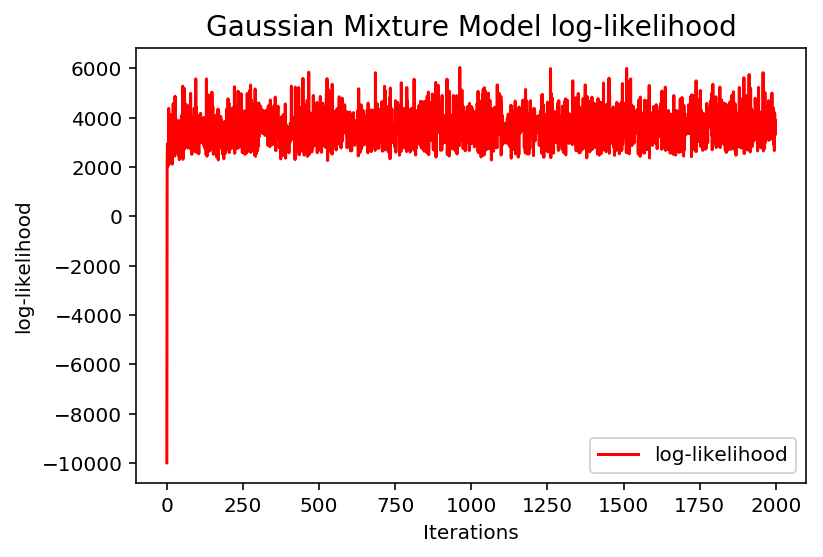

Try for k value:  9
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 2740.46719086
Iterator number 100   Log-Likelihood 4118.76076321
Iterator number 150   Log-Likelihood 2448.08830255
Iterator number 200   Log-Likelihood 3618.10345211
Iterator number 250   Log-Likelihood 4323.51326611
Iterator number 300   Log-Likelihood 3359.48634084
Iterator number 350   Log-Likelihood 2815.86372501
Iterator number 400   Log-Likelihood 4222.21770706
Iterator number 450   Log-Likelihood 3733.35880803
Iterator number 500   Log-Likelihood 3618.64623451
Iterator number 550   Log-Likelihood 4889.50078328
Iterator number 600   Log-Likelihood 4889.50078328
Iterator number 650   Log-Likelihood 4889.50078328
Iterator number 700   Log-Likelihood 4889.50078328
Iterator number 750   Log-Likelihood 4889.50078328
Iterator number 800   Log-Likelihood 4889.50078328
Iterator number 850   Log-Likelihood 4889.50078328
Iterator number 900   Log-Likelihood 4889.50078328
Iterator number 950   

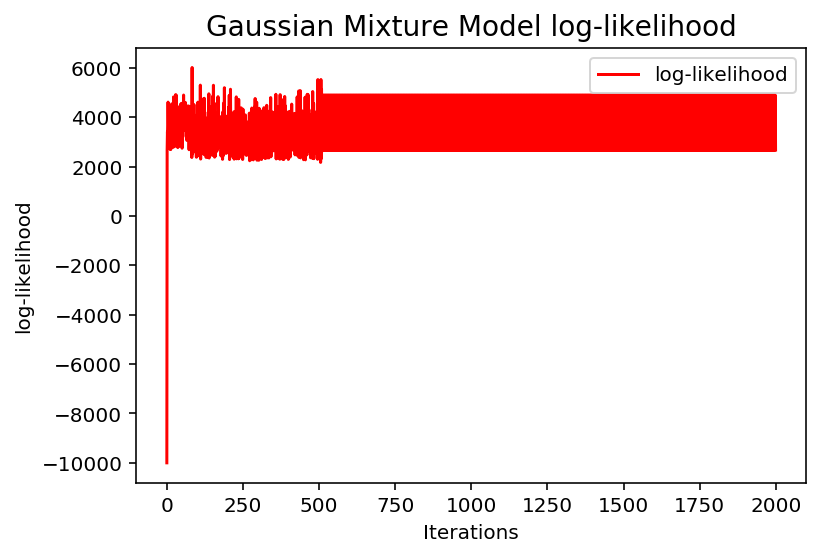

Try for k value:  10
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 4869.74904272
Iterator number 100   Log-Likelihood 5154.45674796
Iterator number 150   Log-Likelihood 4869.74904272
Iterator number 200   Log-Likelihood 5154.45674796
Iterator number 250   Log-Likelihood 4869.74904272
Iterator number 300   Log-Likelihood 5154.45674796
Iterator number 350   Log-Likelihood 4869.74904272
Iterator number 400   Log-Likelihood 5154.45674796
Iterator number 450   Log-Likelihood 4869.74904272
Iterator number 500   Log-Likelihood 5154.45674796
Iterator number 550   Log-Likelihood 4869.74904272
Iterator number 600   Log-Likelihood 5154.45674796
Iterator number 650   Log-Likelihood 4869.74904272
Iterator number 700   Log-Likelihood 5154.45674796
Iterator number 750   Log-Likelihood 4869.74904272
Iterator number 800   Log-Likelihood 5154.45674796
Iterator number 850   Log-Likelihood 4869.74904272
Iterator number 900   Log-Likelihood 5154.45674796
Iterator number 950  

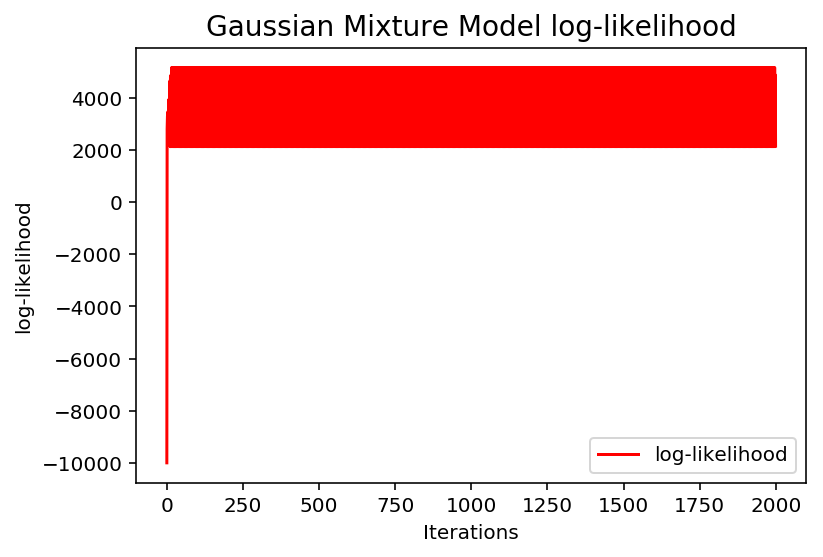

In [42]:
print("Trying Out different Values of K")
log_likelihood = []
for k in range(2,11):
    print("Try for k value: ",k)
    log_prob_norm_plot = []
    my_model = GaussianMixture(K = k)
    log_likelihood.append(my_model.fit(feature_train))
    ## Plotting the log-likelihood

    plotLogLikihood(log_prob_norm_plot)

### I started 10 differenct times and above are maximum loglikihood for different k values. For different Values of k the final log liklihood after 2000 iterations or convergence is 

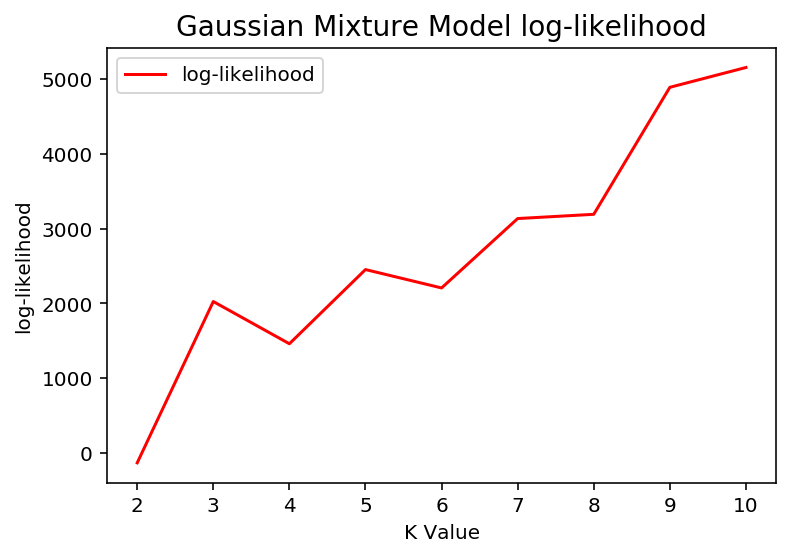

In [43]:
ax1 = plt.subplots()[1]
X = list(range(len(log_likelihood)))
X = [x.__add__(2) for x in X]
ax1.plot(X,log_likelihood, 'r',label = "log-likelihood")
legend = ax1.legend()
plt.title("Gaussian Mixture Model log-likelihood", fontsize=14)
plt.xlabel("K Value")
plt.ylabel("log-likelihood")
plt.show();

# Clear it can be seen that K = 10 gives the highest log likelihood

## Loading NEW DATA

In [44]:
with open("gmm/hw3-data") as file:
    num_of_samples = N = 0
    num_of_features = M = 0
    for i,line in enumerate(file):
        if i == 0:
#             print(line)
            num_of_features = M = len(line.split())       
    num_of_samples = N = i + 1

def acquireDataGMM():
    with open("gmm/hw3-data") as file:

        feature_train_gmm = np.zeros([N,M])
        for i,line in enumerate(file):
            line = line.split()
            feature_train_gmm[i] = list(map(float,line[:]))

    return feature_train
feature_train_gmm = acquireDataGMM()
print("Loading data Done")

Loading data Done


Trying Out different Values of K
Try for k value:  2
Iterator number 0   Log-Likelihood -9999
Iterator number 15   Log-Likelihood -130.027833568


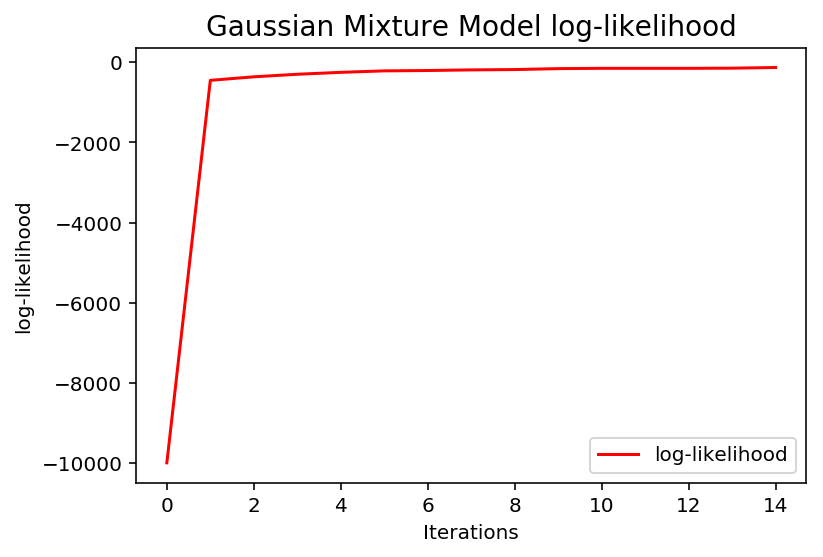

Try for k value:  3
Iterator number 0   Log-Likelihood -9999
Iterator number 8   Log-Likelihood 2026.07874847


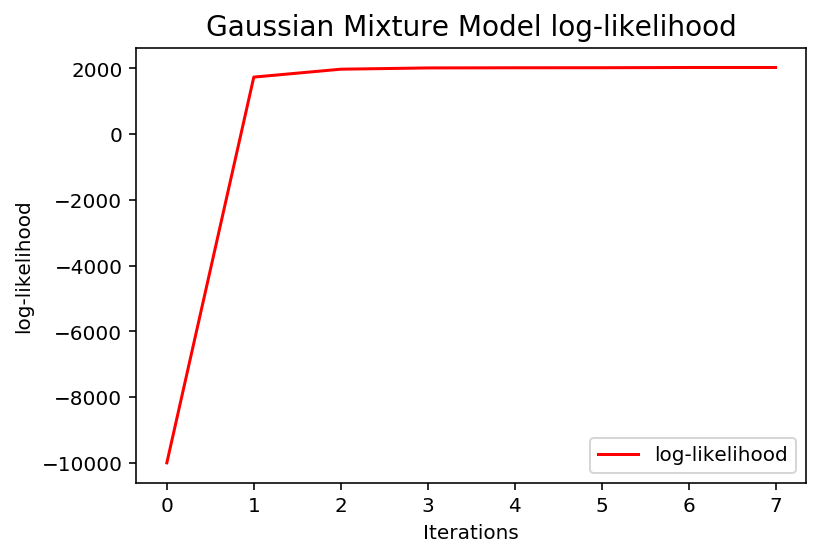

Try for k value:  4
Iterator number 0   Log-Likelihood -9999
Iterator number 8   Log-Likelihood 1461.51633534


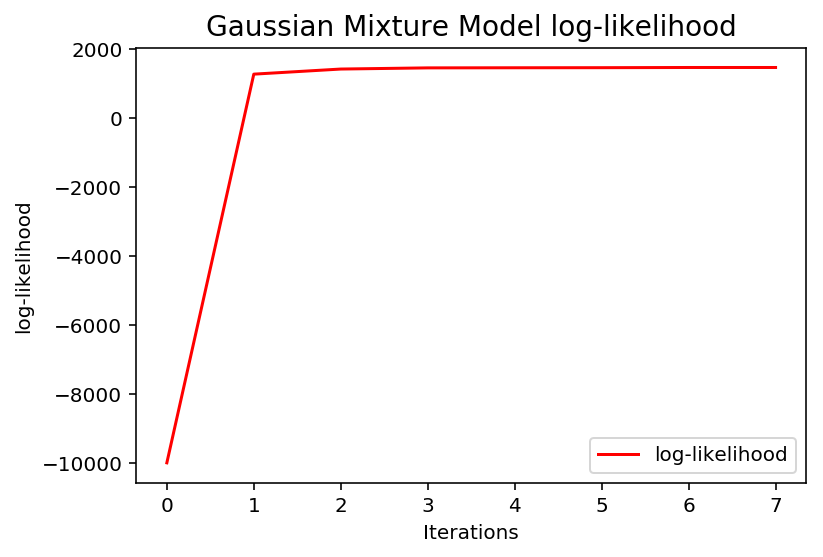

Try for k value:  5
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 2453.34839815
Iterator number 100   Log-Likelihood 2453.34839816
Iterator number 150   Log-Likelihood 2453.34839816
Iterator number 200   Log-Likelihood 2453.34839815
Iterator number 250   Log-Likelihood 2453.34839816
Iterator number 300   Log-Likelihood 2453.34839816
Iterator number 350   Log-Likelihood 2453.34839815
Iterator number 400   Log-Likelihood 2453.34839816
Iterator number 450   Log-Likelihood 2453.34839816
Iterator number 500   Log-Likelihood 2453.34839815
Iterator number 550   Log-Likelihood 2453.34839816
Iterator number 600   Log-Likelihood 2453.34839816
Iterator number 650   Log-Likelihood 2453.34839815
Iterator number 700   Log-Likelihood 2453.34839816
Iterator number 750   Log-Likelihood 2453.34839816
Iterator number 800   Log-Likelihood 2453.34839815
Iterator number 850   Log-Likelihood 2453.34839816
Iterator number 900   Log-Likelihood 2453.34839816
Iterator number 950   

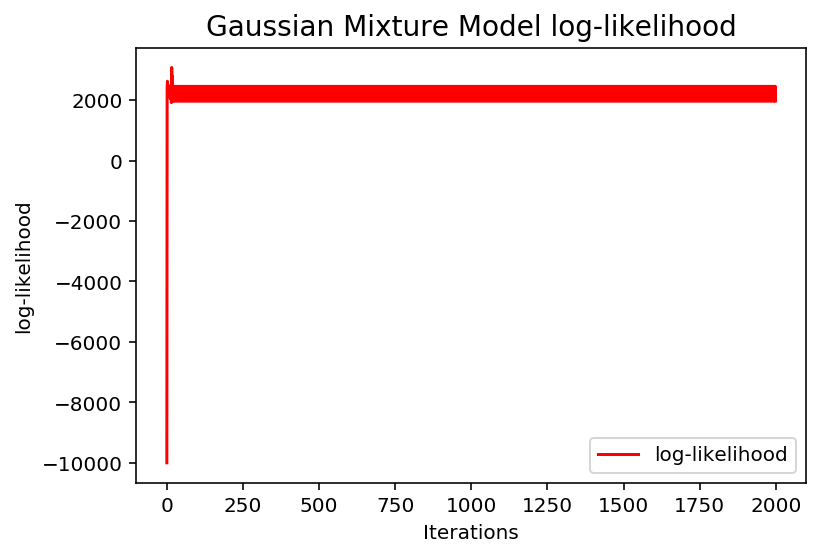

Try for k value:  6
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 2420.42047474
Iterator number 100   Log-Likelihood 2207.56492309
Iterator number 150   Log-Likelihood 2213.24555124
Iterator number 200   Log-Likelihood 2207.56492309
Iterator number 250   Log-Likelihood 2213.24555124
Iterator number 300   Log-Likelihood 2207.56492309
Iterator number 350   Log-Likelihood 2213.24555124
Iterator number 400   Log-Likelihood 2207.56492309
Iterator number 450   Log-Likelihood 2213.24555124
Iterator number 500   Log-Likelihood 2207.56492309
Iterator number 550   Log-Likelihood 2213.24555124
Iterator number 600   Log-Likelihood 2207.56492309
Iterator number 650   Log-Likelihood 2213.24555124
Iterator number 700   Log-Likelihood 2207.56492309
Iterator number 750   Log-Likelihood 2213.24555124
Iterator number 800   Log-Likelihood 2207.56492309
Iterator number 850   Log-Likelihood 2213.24555124
Iterator number 900   Log-Likelihood 2207.56492309
Iterator number 950   

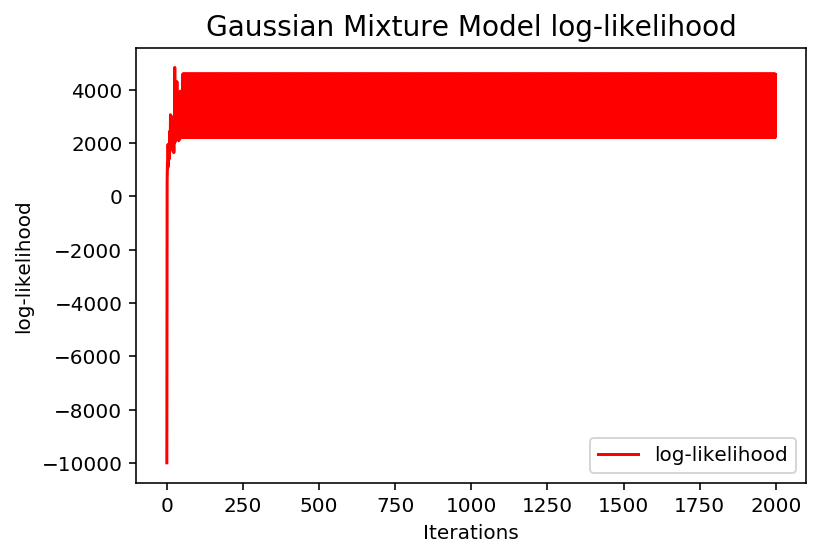

Try for k value:  7
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 3121.09316825
Iterator number 100   Log-Likelihood 4106.88079783
Iterator number 150   Log-Likelihood 4735.68753781
Iterator number 200   Log-Likelihood 4076.80473962
Iterator number 250   Log-Likelihood 4343.59341403
Iterator number 300   Log-Likelihood 3181.96409413
Iterator number 350   Log-Likelihood 5232.47287072
Iterator number 400   Log-Likelihood 5859.72105665
Iterator number 450   Log-Likelihood 4456.50946281
Iterator number 500   Log-Likelihood 5043.61282234
Iterator number 550   Log-Likelihood 4755.55322849
Iterator number 600   Log-Likelihood 4249.80947733
Iterator number 650   Log-Likelihood 4491.63593143
Iterator number 700   Log-Likelihood 5050.06482347
Iterator number 750   Log-Likelihood 5117.68219754
Iterator number 800   Log-Likelihood 4019.55153245
Iterator number 850   Log-Likelihood 4465.76177503
Iterator number 900   Log-Likelihood 4567.37747124
Iterator number 950   

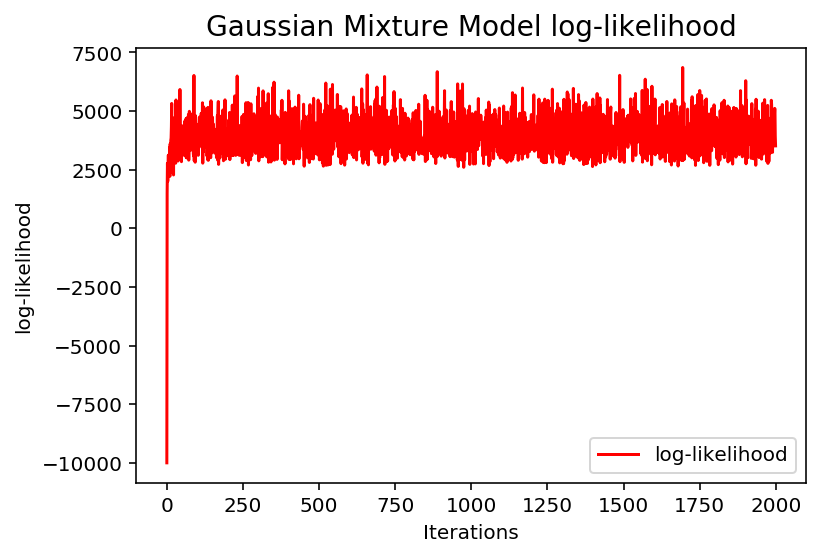

Try for k value:  8
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 2950.58646518
Iterator number 100   Log-Likelihood 3234.50334288
Iterator number 150   Log-Likelihood 4359.72530436
Iterator number 200   Log-Likelihood 2416.89325061
Iterator number 250   Log-Likelihood 3092.28029803
Iterator number 300   Log-Likelihood 4162.55899619
Iterator number 350   Log-Likelihood 3774.37299023
Iterator number 400   Log-Likelihood 4714.7547992
Iterator number 450   Log-Likelihood 3583.59369111
Iterator number 500   Log-Likelihood 3435.08332288
Iterator number 550   Log-Likelihood 3597.8552007
Iterator number 600   Log-Likelihood 3829.23732839
Iterator number 650   Log-Likelihood 3031.30365835
Iterator number 700   Log-Likelihood 2707.44644179
Iterator number 750   Log-Likelihood 2957.75689035
Iterator number 800   Log-Likelihood 4238.56708262
Iterator number 850   Log-Likelihood 4100.71762749
Iterator number 900   Log-Likelihood 3698.14112199
Iterator number 950   Lo

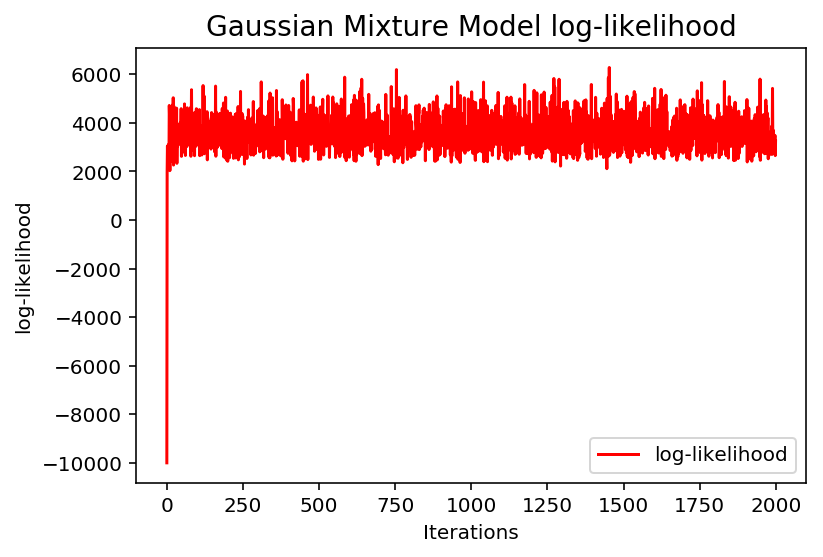

Try for k value:  9
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 4068.47566589
Iterator number 100   Log-Likelihood 4068.47566589
Iterator number 150   Log-Likelihood 4068.47566589
Iterator number 200   Log-Likelihood 4068.47566589
Iterator number 250   Log-Likelihood 4068.47566589
Iterator number 300   Log-Likelihood 4068.47566589
Iterator number 350   Log-Likelihood 4068.47566589
Iterator number 400   Log-Likelihood 4068.47566589
Iterator number 450   Log-Likelihood 4068.47566589
Iterator number 500   Log-Likelihood 4068.47566589
Iterator number 550   Log-Likelihood 4068.47566589
Iterator number 600   Log-Likelihood 4068.47566589
Iterator number 650   Log-Likelihood 4068.47566589
Iterator number 700   Log-Likelihood 4068.47566589
Iterator number 750   Log-Likelihood 4068.47566589
Iterator number 800   Log-Likelihood 4068.47566589
Iterator number 850   Log-Likelihood 4068.47566589
Iterator number 900   Log-Likelihood 4068.47566589
Iterator number 950   

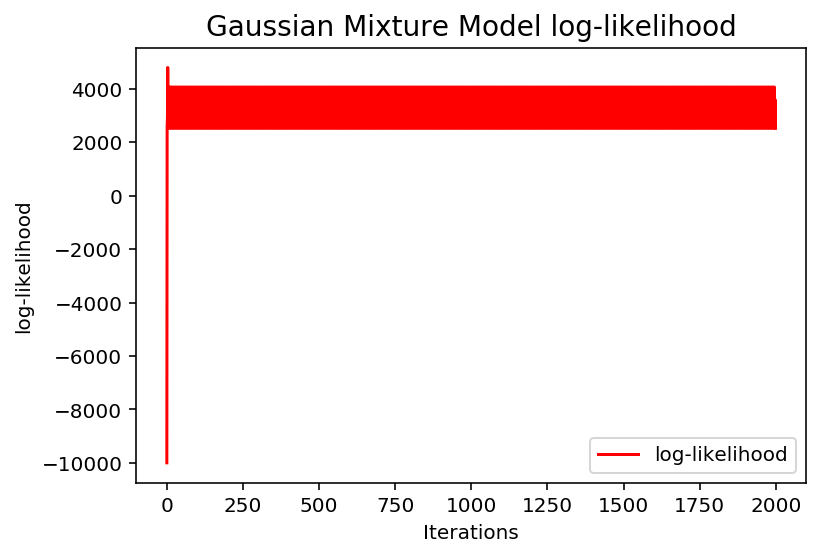

Try for k value:  10
Iterator number 0   Log-Likelihood -9999
Iterator number 50   Log-Likelihood 3087.66745629
Iterator number 100   Log-Likelihood 3087.66745629
Iterator number 150   Log-Likelihood 3087.66745629
Iterator number 200   Log-Likelihood 3087.66745629
Iterator number 250   Log-Likelihood 3087.66745629
Iterator number 300   Log-Likelihood 3087.66745629
Iterator number 350   Log-Likelihood 3087.66745629
Iterator number 400   Log-Likelihood 3087.66745629
Iterator number 450   Log-Likelihood 3087.66745629
Iterator number 500   Log-Likelihood 3087.66745629
Iterator number 550   Log-Likelihood 3087.66745629
Iterator number 600   Log-Likelihood 3087.66745629
Iterator number 650   Log-Likelihood 3087.66745629
Iterator number 700   Log-Likelihood 3087.66745629
Iterator number 750   Log-Likelihood 3087.66745629
Iterator number 800   Log-Likelihood 3087.66745629
Iterator number 850   Log-Likelihood 3087.66745629
Iterator number 900   Log-Likelihood 3087.66745629
Iterator number 950  

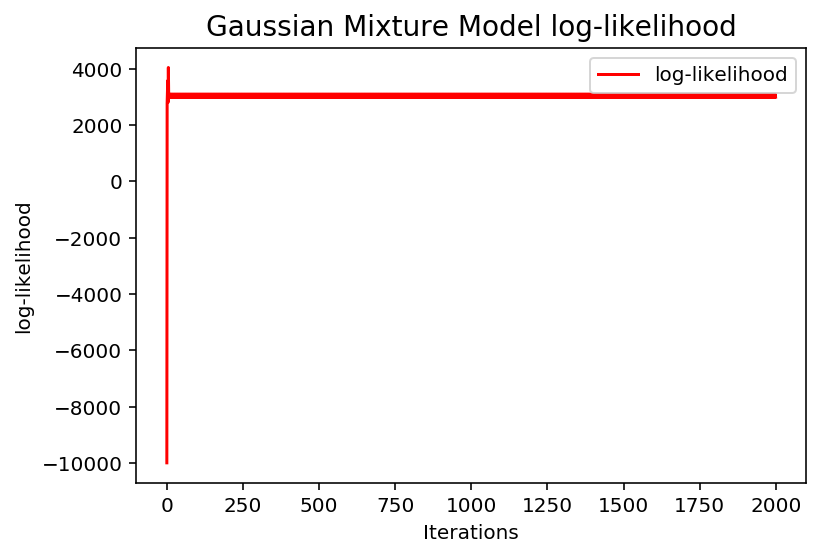

In [46]:
print("Trying Out different Values of K")
log_likelihood = []
for k in range(2,11):
    print("Try for k value: ",k)
    log_prob_norm_plot = []
    my_model = GaussianMixture(K = k)
    feature_train_gmm = acquireDataGMM() # Load data everytime
    log_likelihood.append(my_model.fit(feature_train_gmm))
    ## Plotting the log-likelihood

    plotLogLikihood(log_prob_norm_plot)

### Plotting log-likelihood for different values of K for new data

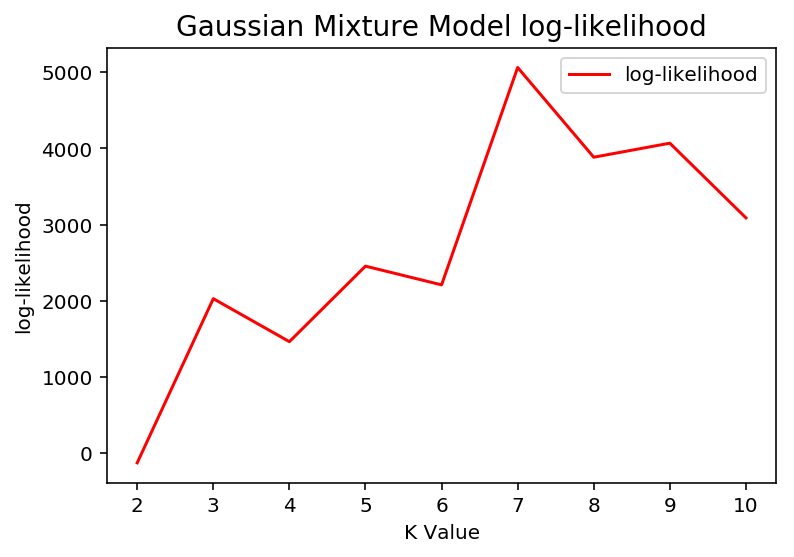

In [47]:
ax1 = plt.subplots()[1]
X = list(range(len(log_likelihood)))
X = [x.__add__(2) for x in X]
ax1.plot(X,log_likelihood, 'r',label = "log-likelihood")
legend = ax1.legend()
plt.title("Gaussian Mixture Model log-likelihood", fontsize=14)
plt.xlabel("K Value")
plt.ylabel("log-likelihood")
plt.show();

## Clearly the above picture shows that k=7 gives the highest log-likelihood